In [1]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download

In [3]:
tables = data_download.get_tables(data_download.get_dataframes())

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [5]:
# datadict = data_download.get_dataframes()
# tables = data_download.get_tables(datadict)

In [16]:
ordinal = tables[0]
categorical = tables[1]

In [105]:
ordinal.head()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,...,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,...,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,...,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,...,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,...,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,...,0,0,0,0,0,0,0,0,0,0


In [226]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,18,5,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,5,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,5,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,5,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,5,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N


In [166]:
correlations = ordinal.corr()['SalePrice']

In [196]:
high_corrs = correlations.sort_values(ascending = False).head(15)
low_corrs = correlations.sort_values(ascending = True).head(10)

In [197]:
high_corrs

SalePrice           1.000000
BldgGrade           0.625155
SqFtTotLiving       0.600756
SqFt1stFloor        0.352494
BathFullCount       0.336938
SqFtOpenPorch       0.293147
Bedrooms            0.292941
Stories             0.287711
Territorial         0.250041
SqFtFinBasement     0.240641
SqFtTotBasement     0.227445
LakeWashington      0.214934
Bath3qtrCount       0.206773
FinBasementGrade    0.201788
SqFtDeck            0.201664
Name: SalePrice, dtype: float64

In [185]:
low_corrs

Condition             -0.065275
FpFreestanding        -0.061528
SqFtUnfinFull          0.002749
SqFtEnclosedPorch      0.004030
TrafficNoise           0.004827
SqFtUnfinHalf          0.006446
NbrLivingUnits         0.009405
MtRainier              0.021947
SmallLakeRiverCreek    0.039506
WfntFootage            0.046074
Name: SalePrice, dtype: float64

In [186]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

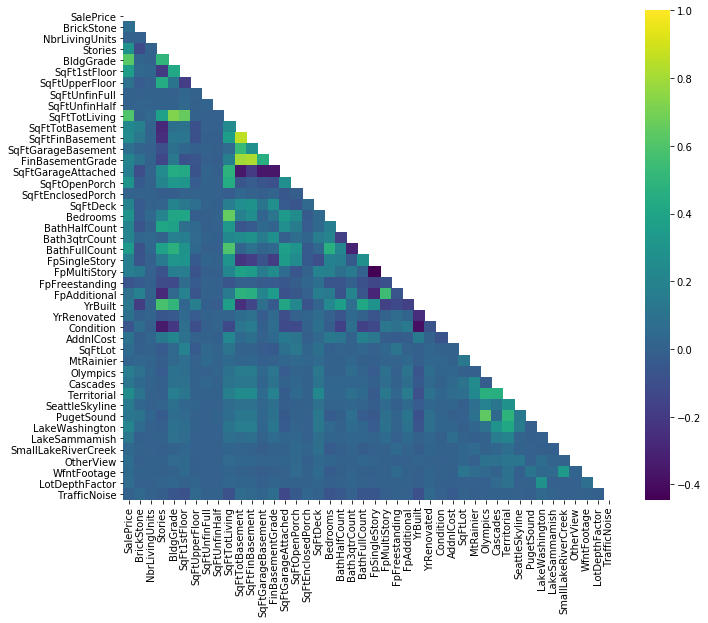

In [187]:
corr = ordinal.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

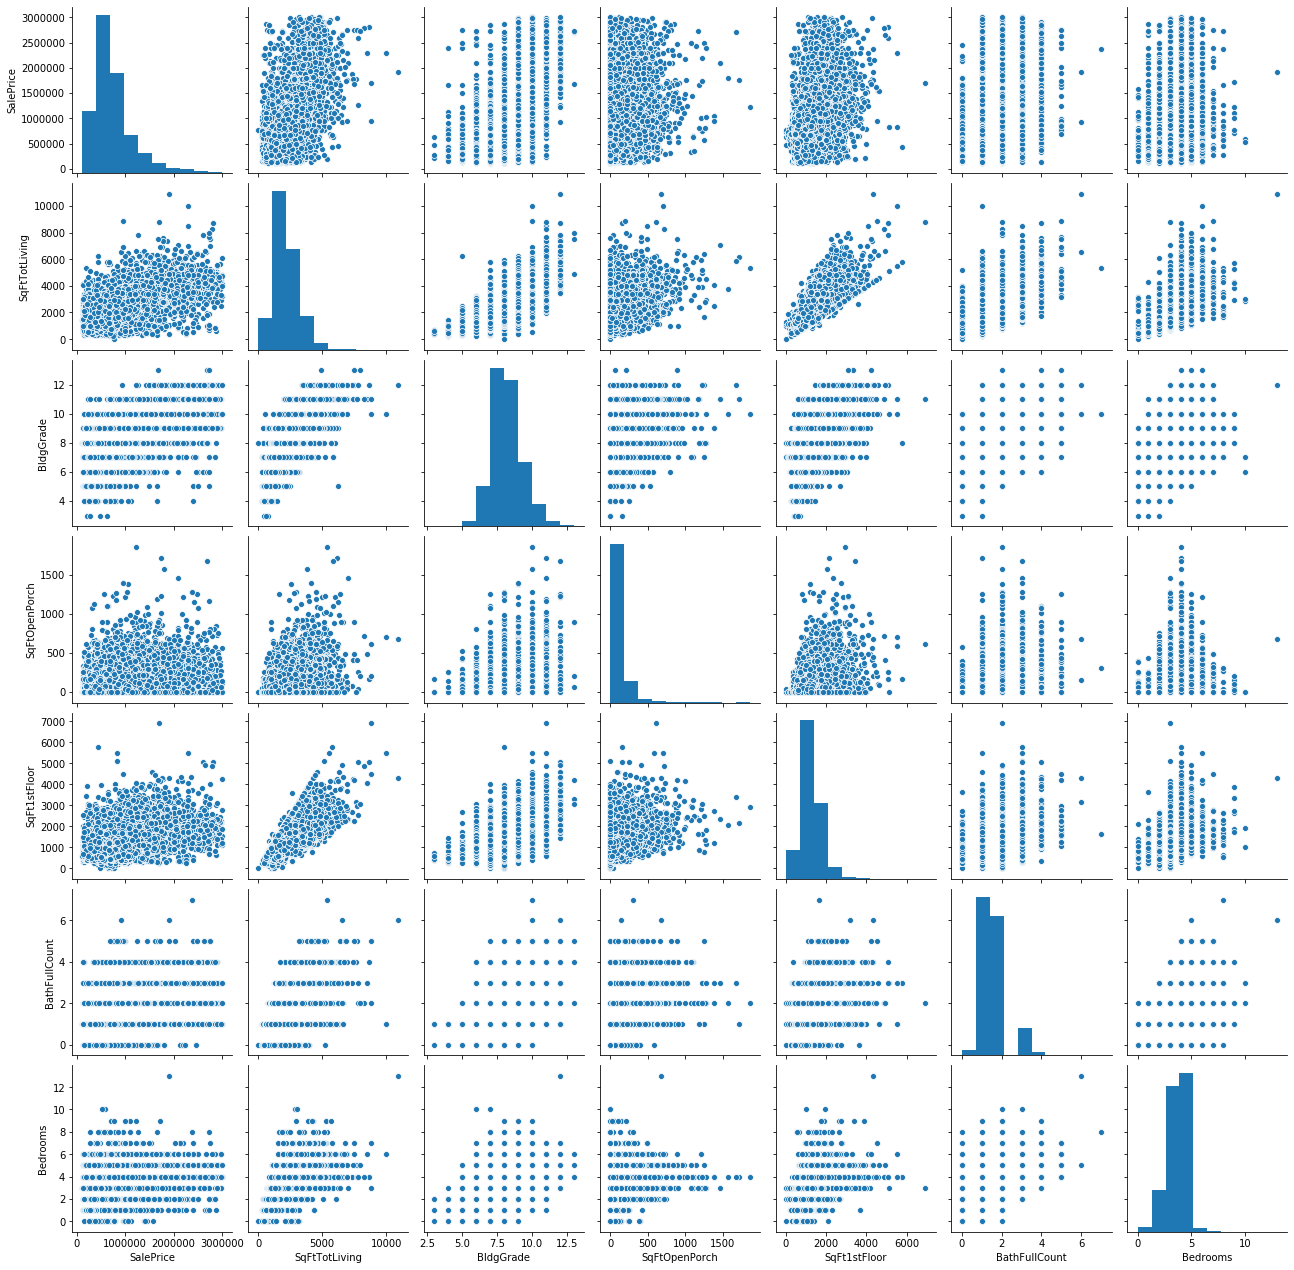

In [209]:
positively_correlated_cols = ['SalePrice','SqFtTotLiving', 'BldgGrade','SqFtOpenPorch', 'SqFt1stFloor', 'BathFullCount', 'Bedrooms']
positively_correlated_df = ordinal[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

In [136]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=10)
select = select.fit(X = ordinal.drop('SalePrice', axis=1), y = ordinal['SalePrice'])

select.support_

#select.ranking_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False])

In [137]:
predictors = ordinal[ordinal.columns[[True] + list(select.support_) ]]

In [138]:
preds = str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
preds

'BldgGrade + Bath3qtrCount + BathFullCount + Olympics + SeattleSkyline + PugetSound + LakeWashington + LakeSammamish + SmallLakeRiverCreek + OtherView'

In [104]:
# model = smf.ols(formula = formula, data = preds).fit()
# model.summary()

In [210]:
formula = 'SalePrice ~ BldgGrade'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:28   Log-Likelihood:            -3.9475e+05
No. Observations:               27924   AIC:                         7.895e+05
Df Residuals:                   27922   BIC:                         7.895e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.068e+06   1.38e+04    -77.324      0.000    -1.1e+06   -1.04e+06
BldgGrade    2.37e+05   1771.126    133.840      0.000    2.34e+05    2.41e+05
==============================================================================
Omnibus:                     8751.934   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36017.594
Skew:                           1.506   Prob(JB):                         0.00
Kurtosis:                       7.678   Cond. No.                         54.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
formula = 'SalePrice ~ BldgGrade + Condition + Bedrooms + BathFullCount  + Bath3qtrCount + FinBasementGrade  + SqFtOpenPorch'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3018.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:31:33   Log-Likelihood:            -3.9380e+05
No. Observations:               27924   AIC:                         7.876e+05
Df Residuals:                   27916   BIC:                         7.877e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.092e+06   1.92e+04    -56.982      0.000   -1.13e+06   -1.05e+06
BldgGrade         2.021e+05   2192.849     92.182      0.000    1.98e+05    2.06e+05
Condition          4.04e+04   2903.010     13.915      0.000    3.47e+04    4.61e+04
Bedrooms         -1.499e+04   2575.415     -5.820      0.000      -2e+04   -9939.778
BathFullCount     6.365e+04   3996.306     15.927      0.000    5.58e+04    7.15e+04
Bath3qtrCount     7.287e+04   3808.612     19.134      0.000    6.54e+04    8.03e+04
FinBasementGrade  1.257e+04    571.141     22.014      0.000    1.15e+04    1.37e+04
SqFtOpenPorch      369.4970     17.183     21.503      0.000     335.817     403.177
==============================================================================
Omnibus:                     8731.179   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39580.429
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                       8.041   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# SalePrice
# BldgGrade
# SqFtTotLiving
# SqFt1stFloor
# BathFullCount
# SqFtOpenPorch
# Bedrooms
# Stories
# Territorial
# SqFtFinBasement
# SqFtTotBasement   
# Bath3qtrCount       
# FinBasementGrade   
# SqFtDeck            

In [242]:
formula = 'SalePrice ~ BldgGrade + SeattleSkyline + LakeWashington + LakeSammamish'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     5147.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:18:23   Log-Likelihood:            -3.9396e+05
No. Observations:               27924   AIC:                         7.879e+05
Df Residuals:                   27919   BIC:                         7.880e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.003e+06   1.35e+04    -74.109      0.000   -1.03e+06   -9.77e+05
BldgGrade        2.27e+05   1741.139    130.371      0.000    2.24e+05     2.3e+05
SeattleSkyline  1.327e+05   8652.344     15.335      0.000    1.16e+05     1.5e+05
LakeWashington  1.822e+05   5828.075     31.271      0.000    1.71e+05    1.94e+05
LakeSammamish    1.82e+05   1.16e+04     15.705      0.000    1.59e+05    2.05e+05
==============================================================================
Omnibus:                     8319.844   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34068.514
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       7.597   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0724814945539936
Rainbow p-value: 1.7862915647191924e-05


In [ ]:
# Linear regression assumes that the input variable linearly predicts the output variable. 
# We already qualitatively checked that with a scatter plot. 
# But I also think it's a good idea to use a statistical test.
# This one is the Rainbow test which is available from the diagnostic submodule of StatsModels
#The null hypothesis is that the model is linearly predicted by the features, 
# alternative hypothesis is that it is not. 
# Thus returning a low p-value means that the current model violates the linearity assumption.

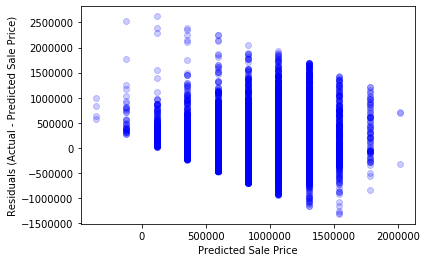

In [214]:
y = ordinal["SalePrice"]
y_hat = model.predict()
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Actual - Predicted Sale Price)")
ax2.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);

In [ ]:
# Homoscadasticity
# Linear regression assumes that the variance of the dependent variable is homogeneous across different value 
# of the independent variable(s). We can visualize this by looking at the predicted life expectancy 
#vs. the residuals.

In [ ]:
# Josh's model is below

In [227]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model
import statsmodels.stats as stats
import statsmodels.stats.api as sms
from sklearn import preprocessing

%matplotlib inline
pd.set_option('display.max_columns', None)

In [228]:
ordcorrs = ordinal.corr()['SalePrice'].sort_values().head(20)
bigcorrs = ordinal[['SalePrice'] + list(ordcorrs.index)]

In [229]:
bigcorrs

,SalePrice,Condition,FpFreestanding,SqFtUnfinFull,SqFtEnclosedPorch,TrafficNoise,SqFtUnfinHalf,NbrLivingUnits,MtRainier,SmallLakeRiverCreek,WfntFootage,SqFtLot,LotDepthFactor,OtherView,BrickStone,SqFtGarageBasement,YrRenovated,FpAdditional,SqFtUpperFloor,AddnlCost,Cascades
0,193000,3,0,0,0,1,0,1,0,0,0,9670,0,0,0,410,0,0,0,0,0
1,550000,3,0,0,0,0,0,1,0,0,0,2500,0,0,0,0,0,0,650,0,0
2,648500,3,0,0,0,0,0,1,0,0,0,5250,0,0,0,0,0,0,0,6000,0
3,1445000,3,0,0,0,0,0,1,0,0,0,5499,0,0,0,0,0,0,0,0,0
4,785000,3,0,0,0,0,0,1,0,0,0,1313,0,0,0,210,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,3,0,0,0,2,0,1,0,0,0,11000,0,0,0,0,0,0,0,0,0
28297,1150000,4,0,0,0,0,0,1,0,0,0,8360,0,0,0,0,0,0,0,0,0
28298,764500,4,0,0,0,0,0,1,0,0,0,14889,0,0,25,0,0,1,0,0,0
28299,469000,3,0,0,0,0,0,1,0,0,0,6175,0,0,0,0,0,0,0,4610,0


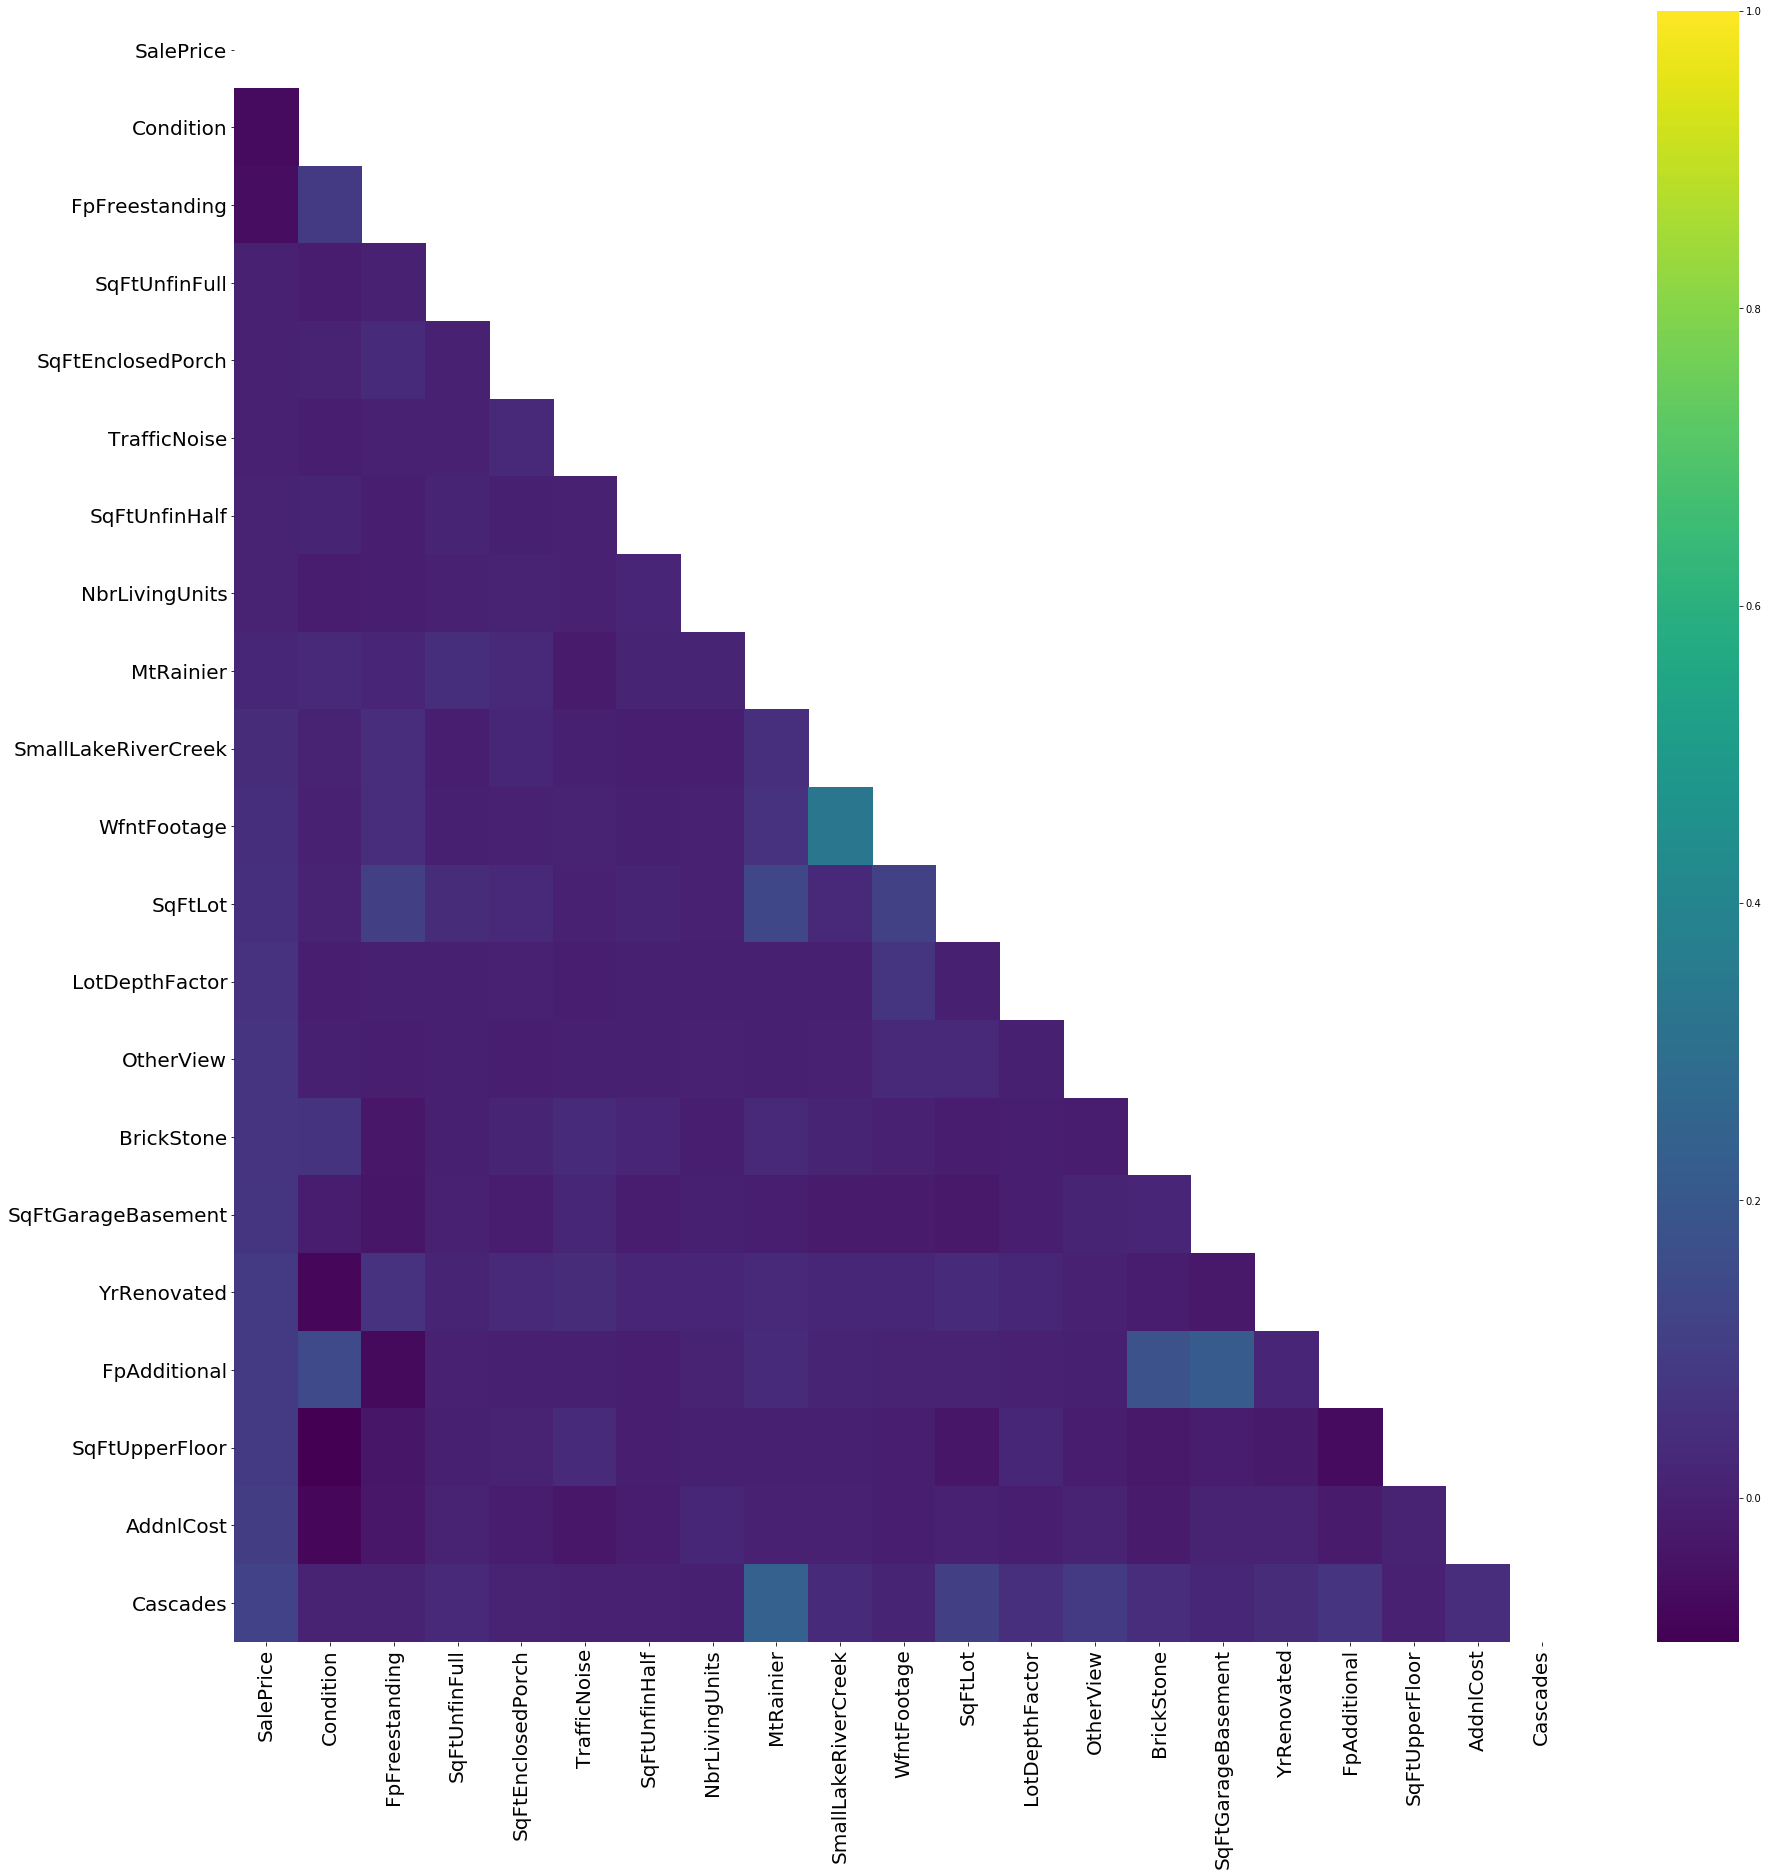

In [230]:
mask = np.triu(np.ones_like(bigcorrs.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (30,30))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.heatmap(bigcorrs.corr(), mask= mask, ax = ax, cmap = 'viridis')

In [231]:
pt = preprocessing.MinMaxScaler()
predictors = pd.DataFrame(pt.fit_transform(bigcorrs))
predictors.columns = bigcorrs.columns

In [232]:
predictors = bigcorrs

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=4)
select = select.fit(X = ordinal.drop('SalePrice', axis=1), y = ordinal['SalePrice'])

select.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False])

In [236]:
predictors = ordinal[ordinal.columns[[True] + list(select.support_) ]]

In [237]:
preds = str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
preds

'BldgGrade + SeattleSkyline + LakeWashington + LakeSammamish'

In [238]:
formula = f'SalePrice ~ {preds}'
formula

'SalePrice ~ BldgGrade + SeattleSkyline + LakeWashington + LakeSammamish'

In [239]:
model = smf.ols(formula = formula, data = predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     5147.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:10:42   Log-Likelihood:            -3.9396e+05
No. Observations:               27924   AIC:                         7.879e+05
Df Residuals:                   27919   BIC:                         7.880e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.003e+06   1.35e+04    -74.109      0.000   -1.03e+06   -9.77e+05
BldgGrade        2.27e+05   1741.139    130.371      0.000    2.24e+05     2.3e+05
SeattleSkyline  1.327e+05   8652.344     15.335      0.000    1.16e+05     1.5e+05
LakeWashington  1.822e+05   5828.075     31.271      0.000    1.71e+05    1.94e+05
LakeSammamish    1.82e+05   1.16e+04     15.705      0.000    1.59e+05    2.05e+05
==============================================================================
Omnibus:                     8319.844   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34068.514
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       7.597   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
model.resid

0       -392598.779691
1       -262592.101619
2       -164092.101619
3        405414.576452
4        -27592.101619
             ...      
28296   -142642.101619
28297    564401.220309
28298    -48092.101619
28299   -570585.423548
28300     24907.898381
Length: 27924, dtype: float64

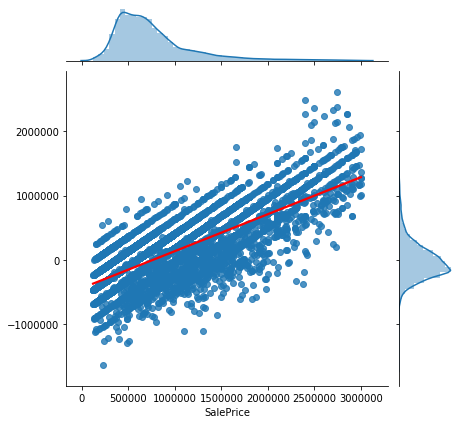

In [241]:
sns.jointplot(predictors['SalePrice'],model.resid, kind = 'reg', line_kws = {'color':"red"})

In [ ]:
# Josh's model below

In [1]:

import os
import sys
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model
import statsmodels.stats as stats
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
ordtable, cattable = data_download.get_tables(data_download.get_dataframes())

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


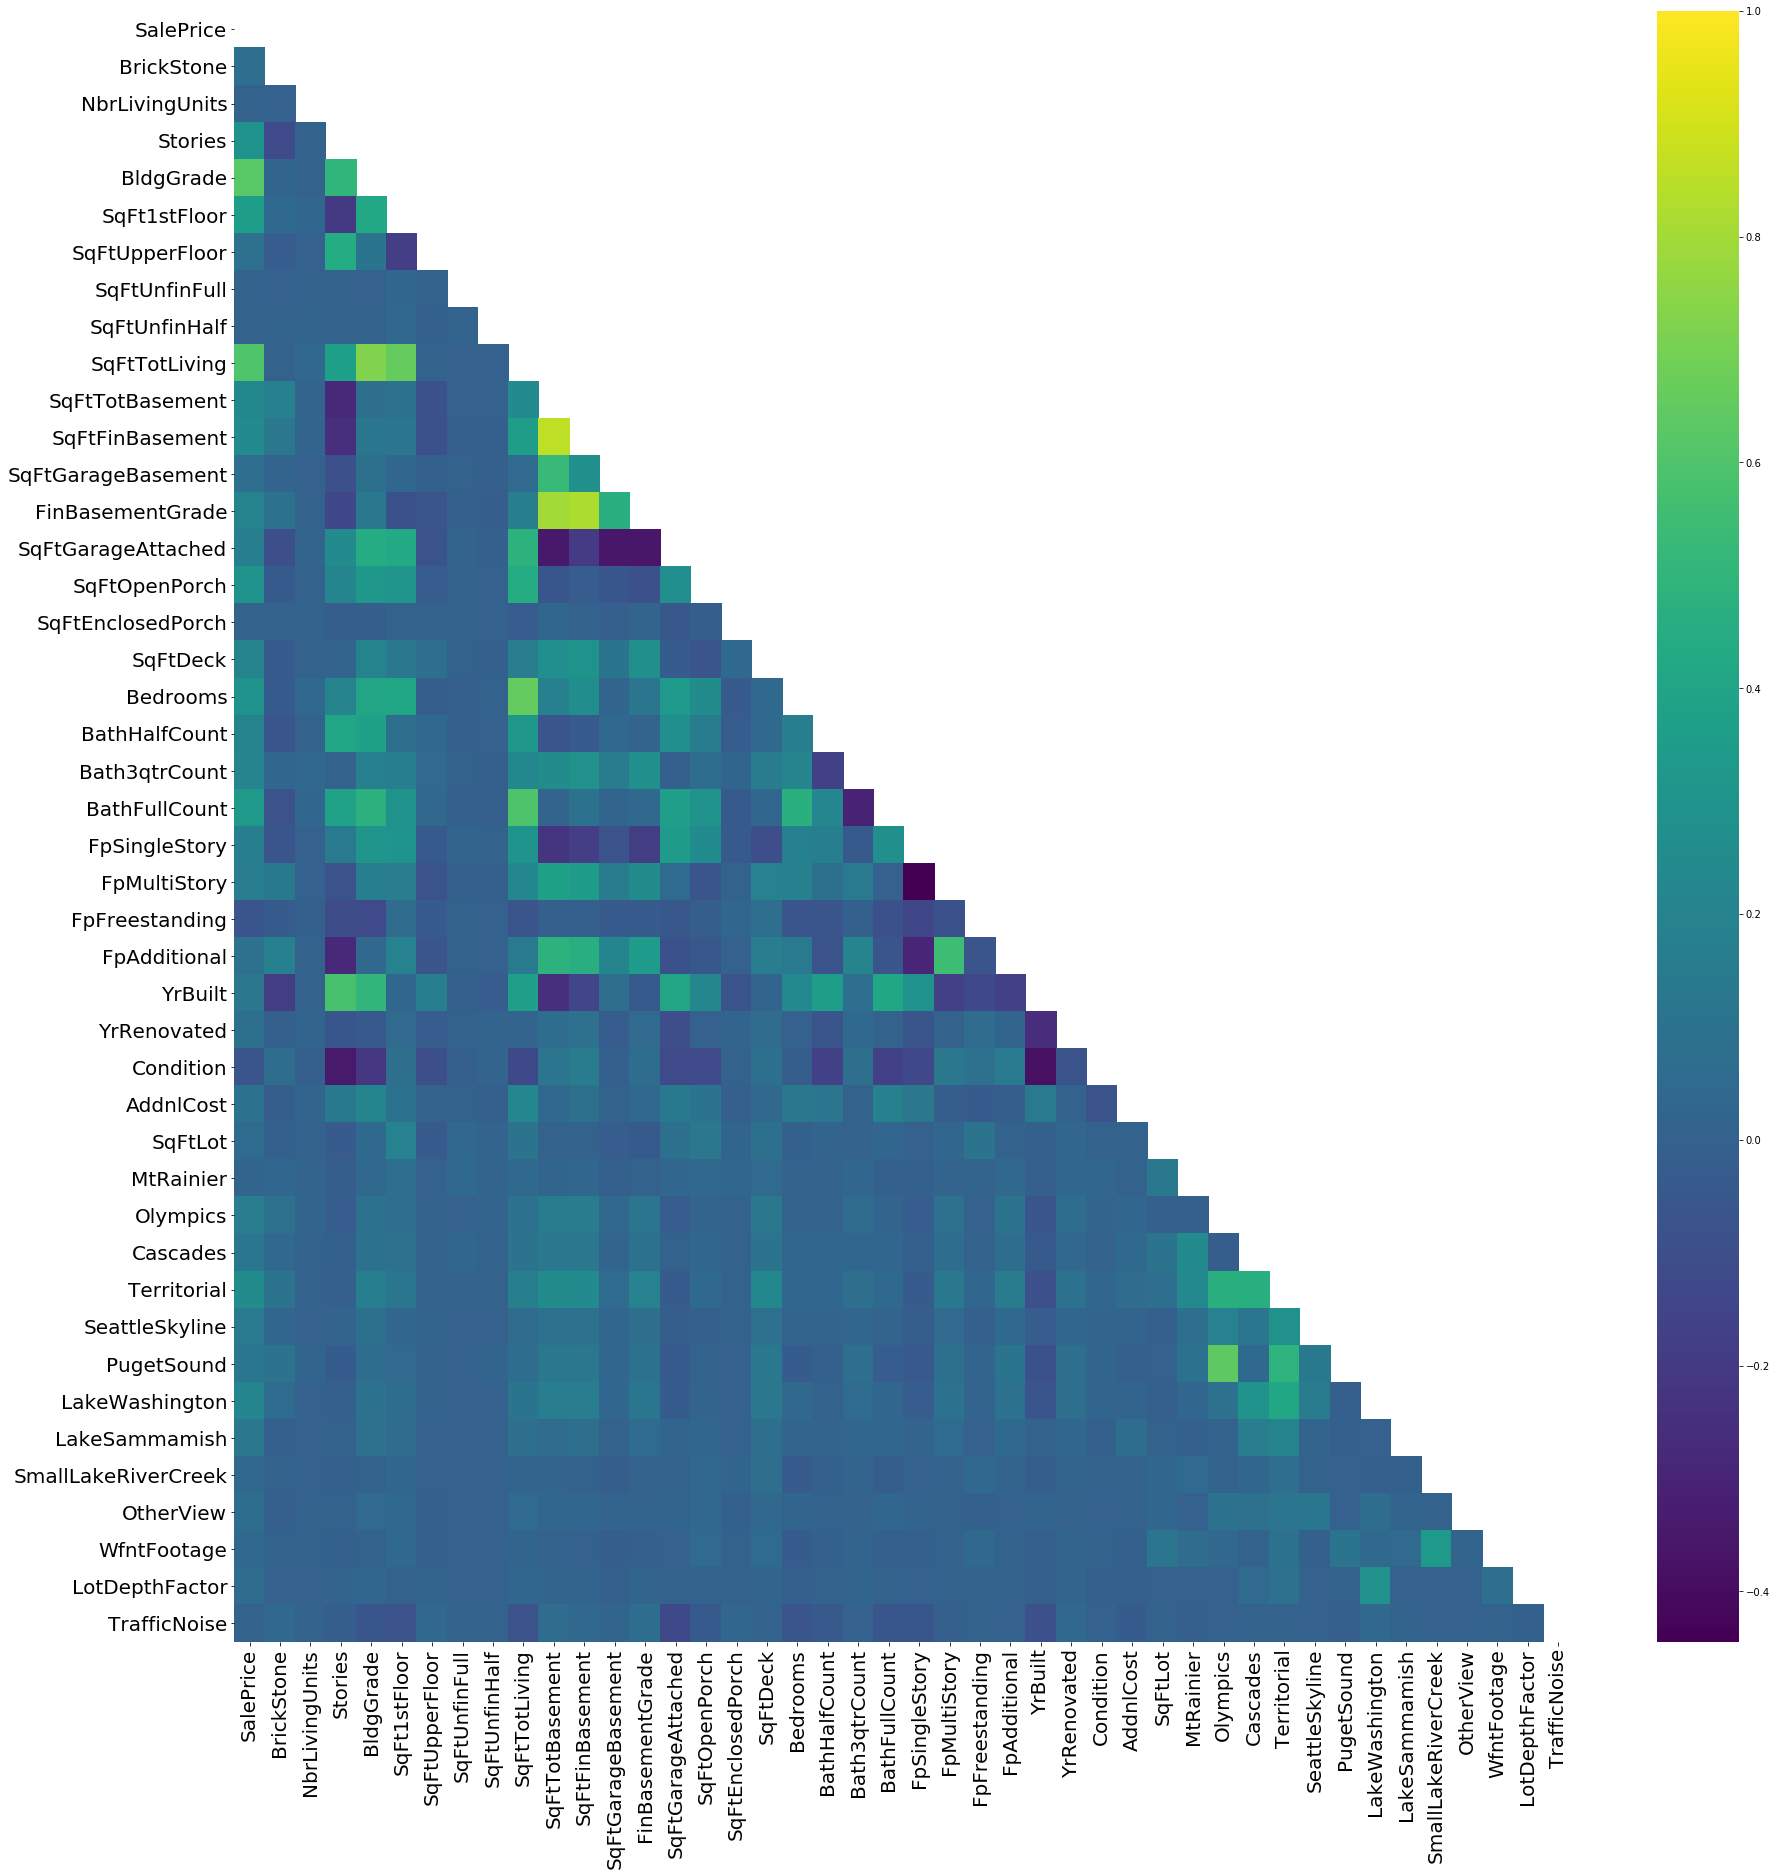

In [3]:
mask = np.triu(np.ones_like(ordtable.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (30,30))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.heatmap(ordtable.corr(), mask= mask, ax = ax, cmap = 'viridis')

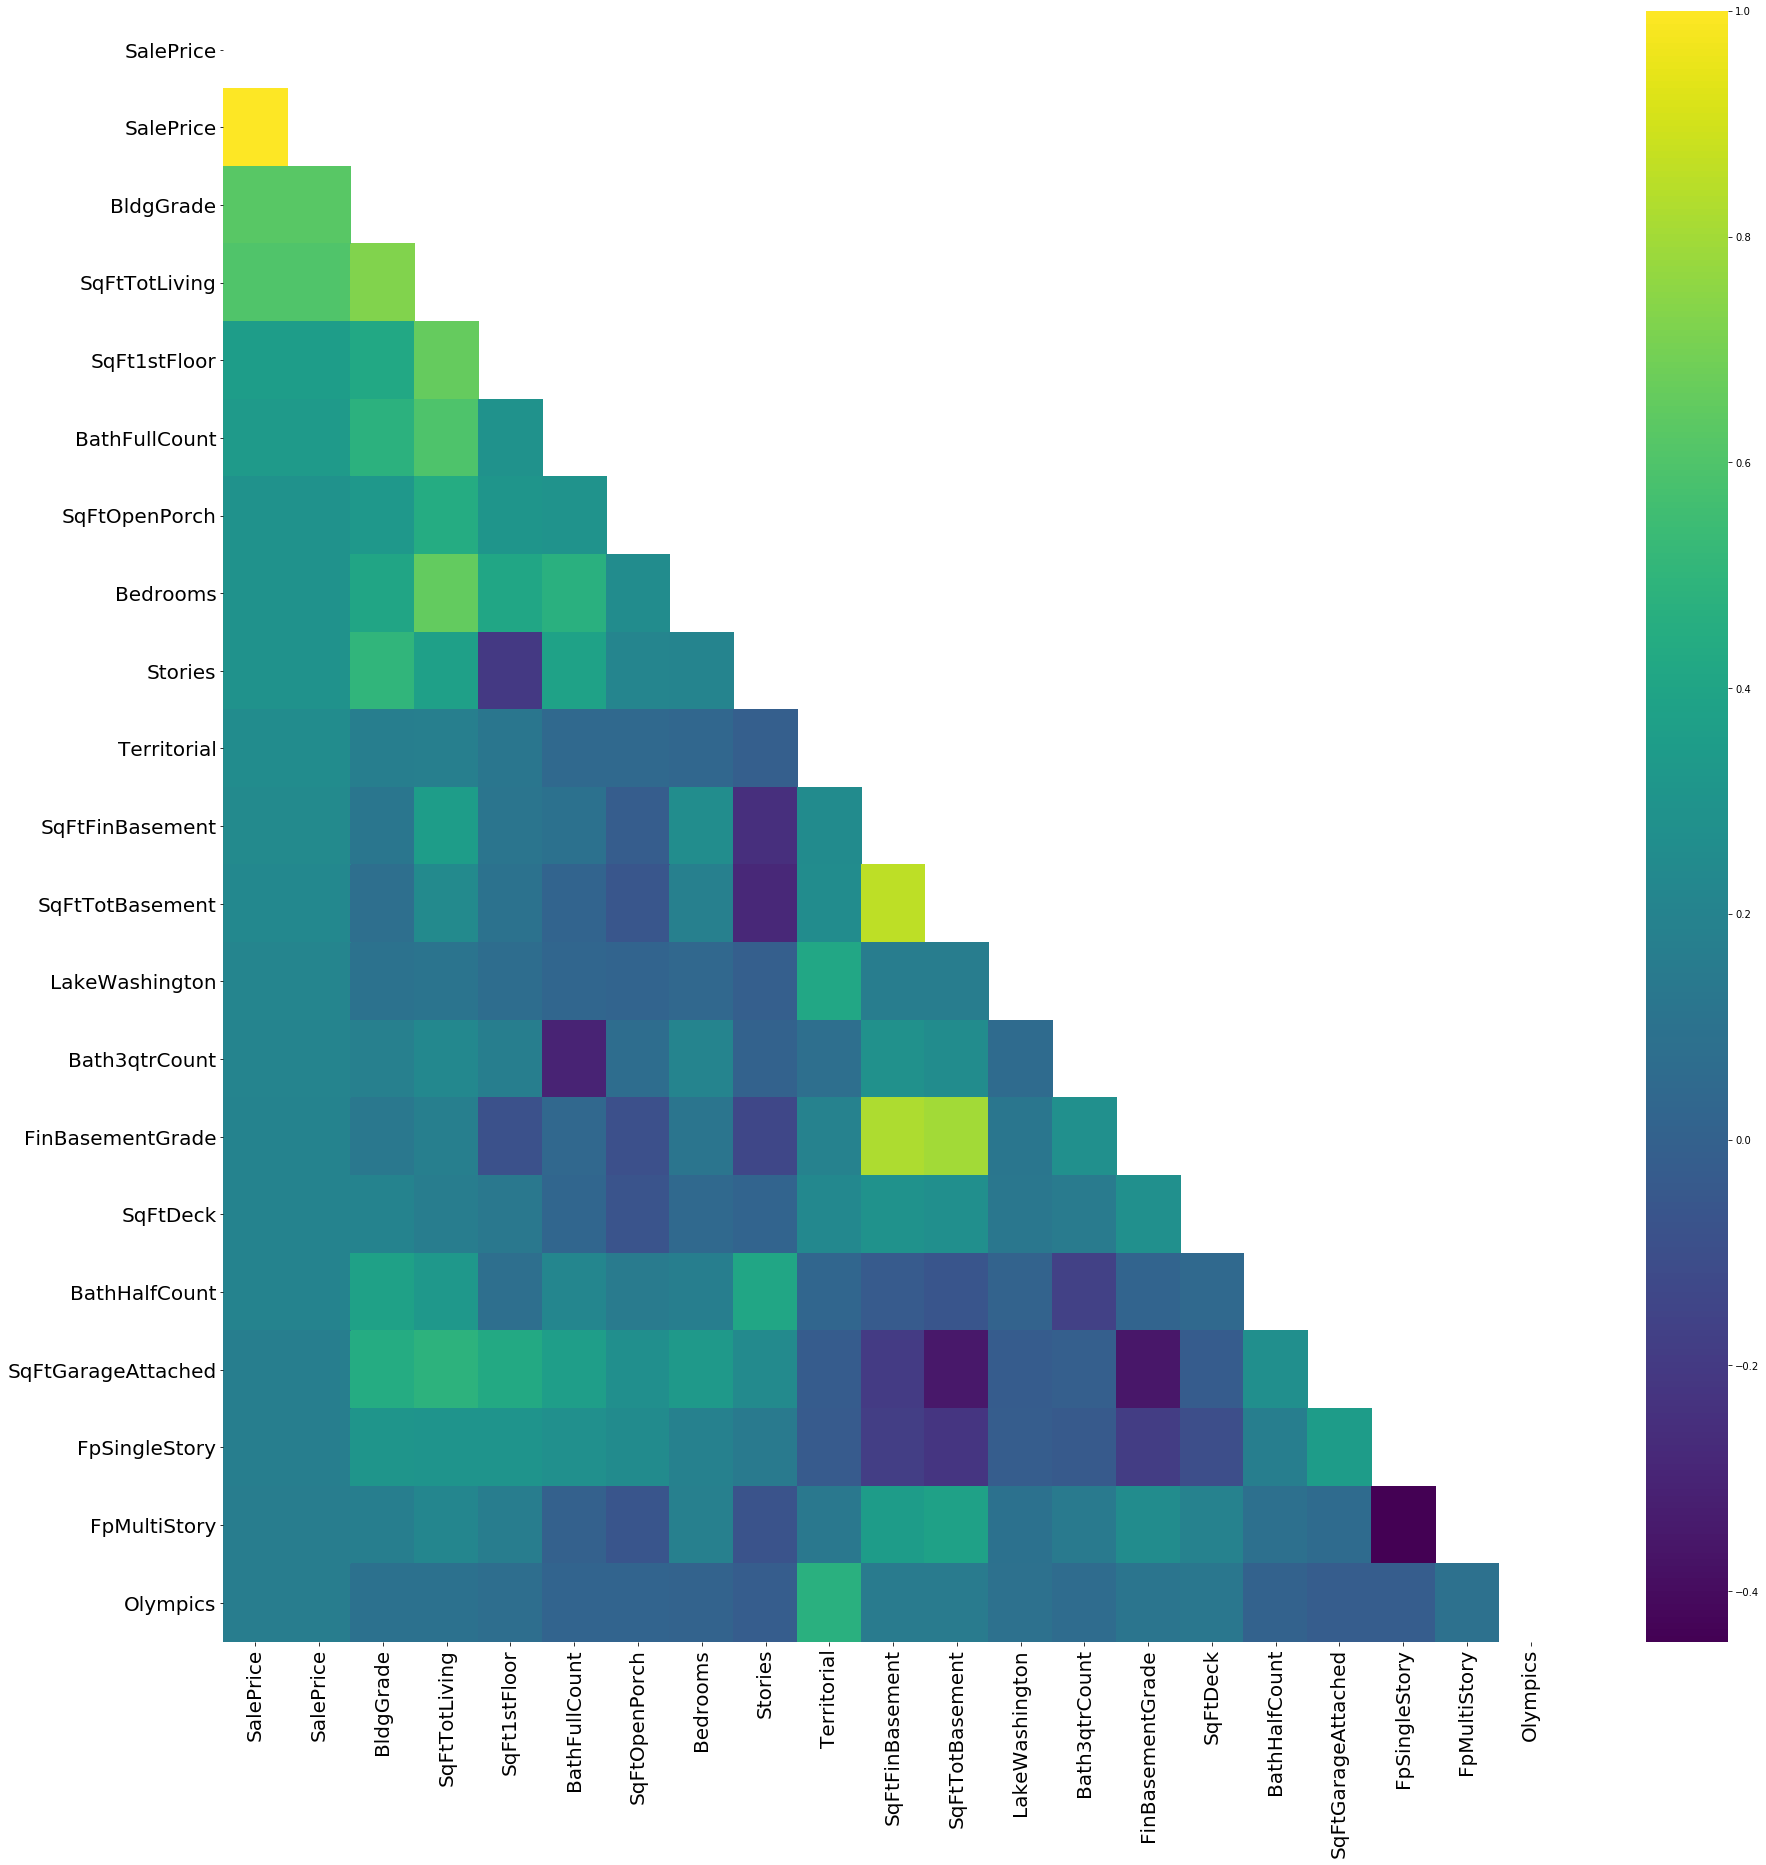

In [4]:
ordcorrs = ordtable.corr()['SalePrice'].abs().sort_values(ascending = False).head(20)
bigcorrs = ordtable[['SalePrice'] + list(ordcorrs.index)]

mask = np.triu(np.ones_like(bigcorrs.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (30,30))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.heatmap(bigcorrs.corr(), mask= mask, ax = ax, cmap = 'viridis')

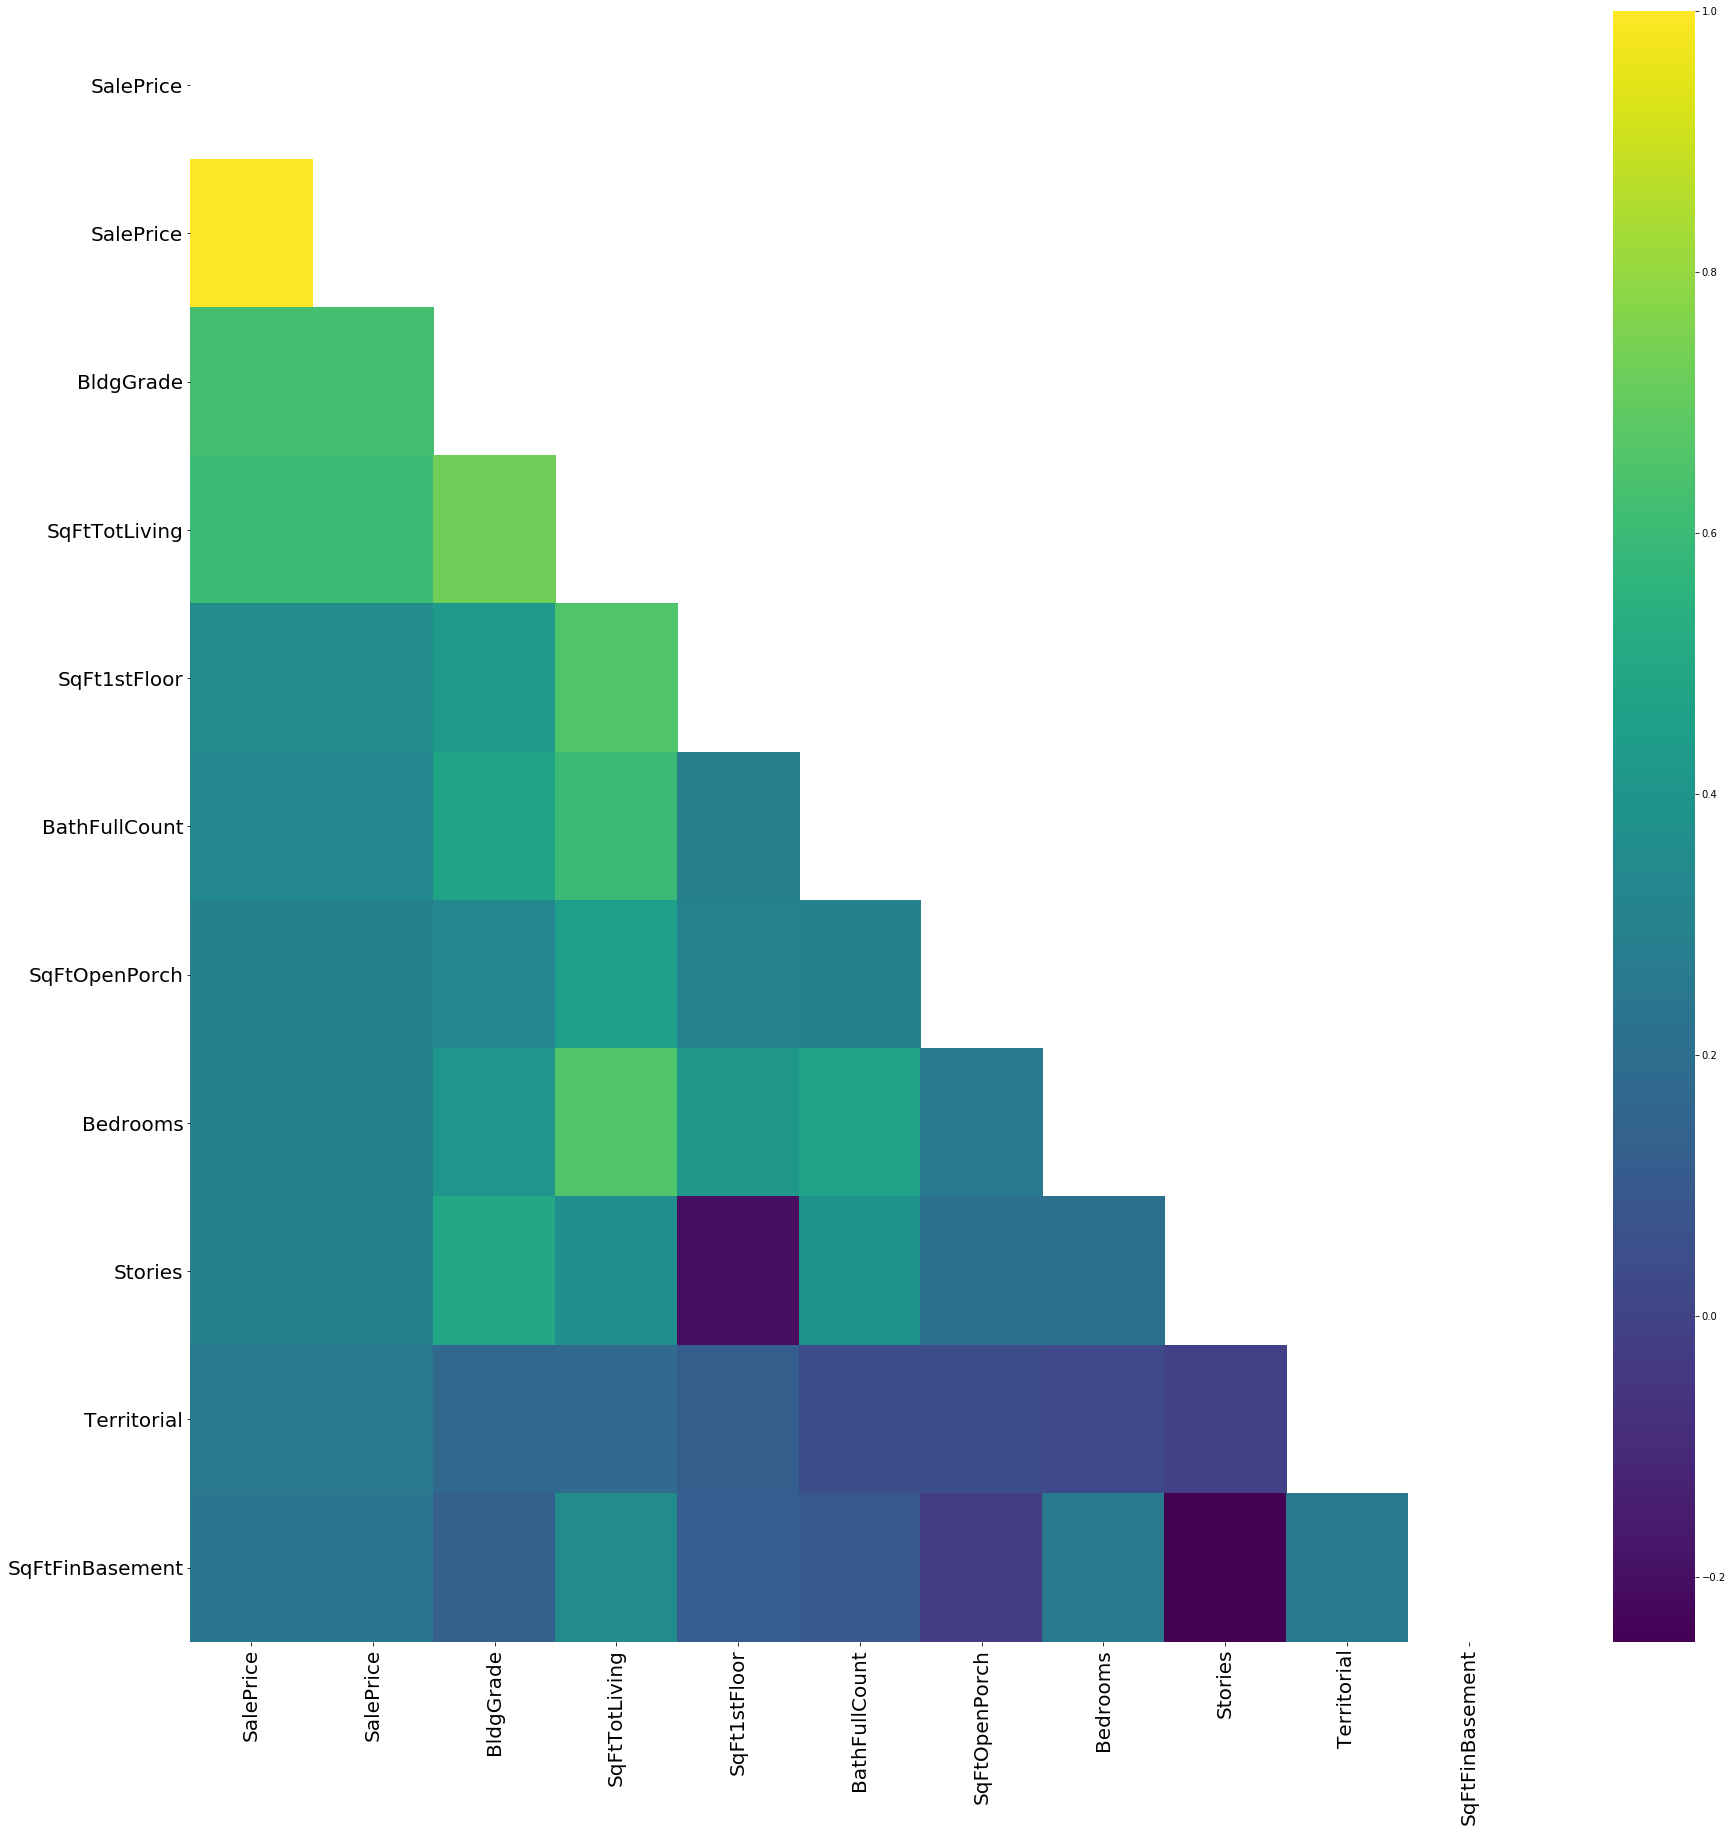

In [5]:
ordcorrs = ordtable.corr()['SalePrice'].abs().sort_values(ascending = False).head(10)
bigcorrs = ordtable[['SalePrice'] + list(ordcorrs.index)]

mask = np.triu(np.ones_like(bigcorrs.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (30,30))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.heatmap(bigcorrs.corr(), mask= mask, ax = ax, cmap = 'viridis')
#plt.savefigreports/figures/

In [7]:
#pt = preprocessing.StandardScaler()
# stardardords = pd.DataFrame(pt.fit_transform(ordtable))
# stardardords.columns = ordtable.columns

In [ ]:
# after running the new list with and removing the scaler, usig rfe with 17, r2 dropped to 45. Adding up to 21 features keeps it at 45. Adding a 22nd
# feature of 'Yrbuilt' increases it to .509.

In [87]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=22)
select = select.fit(X = ordtable.drop('SalePrice', axis=1), y = ordtable['SalePrice'])
predictors = ordtable[ordtable.columns[[True] + list(select.support_) ]]

In [88]:
predictors.columns

Index(['SalePrice', 'NbrLivingUnits', 'Stories', 'BldgGrade',
       'FinBasementGrade', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCount', 'FpSingleStory', 'FpMultiStory', 'FpAdditional',
       'YrBuilt', 'MtRainier', 'Olympics', 'Cascades', 'SeattleSkyline',
       'PugetSound', 'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'TrafficNoise'],
      dtype='object')

In [89]:
preds = 'SalePrice ~ ' + str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
formula = preds

model = smf.ols(formula = formula, data = predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:            -3.9173e+05
No. Observations:               27924   AIC:                         7.835e+05
Df Residuals:                   27901   BIC:                         7.837e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.244e+06   1.54e+05     46.918      0.000    6.94e+06    7.55e+06
NbrLivingUnits      -3.159e+04   3.54e+04     -0.891      0.373   -1.01e+05    3.79e+04
Stories              8.191e+04   4749.476     17.247      0.000    7.26e+04    9.12e+04
BldgGrade            2.137e+05   2453.355     87.086      0.000    2.09e+05    2.18e+05
FinBasementGrade     6402.3053    575.228     11.130      0.000    5274.830    7529.780
Bedrooms            -1.657e+04   2468.363     -6.712      0.000   -2.14e+04   -1.17e+04
BathHalfCount        3.547e+04   4165.547      8.515      0.000    2.73e+04    4.36e+04
Bath3qtrCount        1.222e+05   3815.368     32.020      0.000    1.15e+05     1.3e+05
BathFullCount        1.265e+05   3963.637     31.927      0.000    1.19e+05    1.34e+05
FpSingleStory        1.591e+04   3819.554      4.166      0.000    8424.009    2.34e+04
FpMultiStory        -2.667e+04   5322.351     -5.010      0.000   -3.71e+04   -1.62e+04
FpAdditional         8811.2698   6188.319      1.424      0.154   -3318.139    2.09e+04
YrBuilt             -4294.0553     78.894    -54.428      0.000   -4448.692   -4139.419
MtRainier           -1.931e+04   7904.909     -2.443      0.015   -3.48e+04   -3814.048
Olympics             4.019e+04   6593.504      6.095      0.000    2.73e+04    5.31e+04
Cascades            -1.399e+04   5020.151     -2.787      0.005   -2.38e+04   -4151.425
SeattleSkyline       8.979e+04   8210.797     10.935      0.000    7.37e+04    1.06e+05
PugetSound           2.874e+04   6245.661      4.602      0.000    1.65e+04     4.1e+04
LakeWashington        1.42e+05   5735.833     24.751      0.000    1.31e+05    1.53e+05
LakeSammamish        1.658e+05   1.09e+04     15.221      0.000    1.44e+05    1.87e+05
SmallLakeRiverCreek   5.77e+04   6832.517      8.445      0.000    4.43e+04    7.11e+04
OtherView             4.59e+04   1.02e+04      4.487      0.000    2.58e+04    6.59e+04
TrafficNoise         1.247e+04   3280.396      3.802      0.000    6043.332    1.89e+04
==============================================================================
Omnibus:                     8505.792   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44827.088
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                       8.566   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)


Rainbow statistic: 1.069392415384493
Rainbow p-value: 3.722016275255501e-05


In [ ]:
# The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 
# Thus returning a low p-value means that the current model violates the linearity assumption.

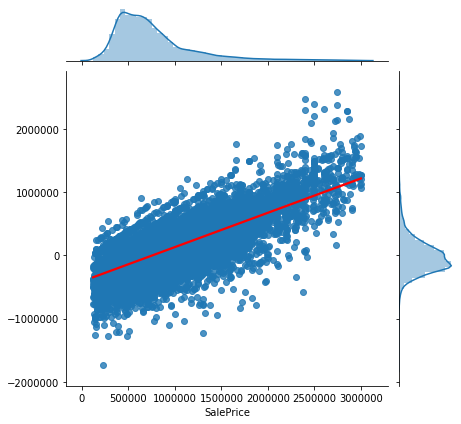

In [74]:
sns.jointplot(predictors['SalePrice'], model.resid, kind = 'reg', line_kws = {'color':"red"})

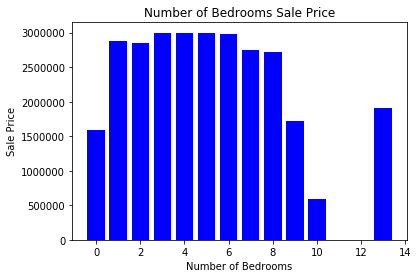

In [121]:
fig = plt.figure
plt.bar(feature, values, color ='blue') 
  
plt.xlabel("Number of Bedrooms") 
plt.ylabel("Sale Price") 
plt.title("Number of Bedrooms Sale Price") 
plt.show()

In [23]:
ordtable.head()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# first one combines porches for front porch vs no porch graph
ordtable['SqFtPorch'] =(ordtable['SqFtEnclosedPorch'] + ordtable['SqFtOpenPorch'])
# second one combines square foot  for lot comparison
#ordtable['TotFloorPlan'] = (ordtable['SqFtGarageAttached'] + ordtable['SqFtDeck'] + ordtable['SqFtPorch'] + ordtable['SqFt1stFloor'])
# ordtable['PropLot'] = ordtable['TotFloorPlan'] / ordtable['SqFtLot']

In [129]:
ordtable['SqFtPorch']

0          0
1          0
2          0
3        300
4          0
        ... 
28296    300
28297      0
28298    230
28299     40
28300      0
Name: SqFtPorch, Length: 27924, dtype: int64

In [141]:
ordtable['Porch']=ordtable['SqFtPorch']>0
ordtable['Porch']=ordtable['Porch'].map({False: "No Porch", True: "Porch"})


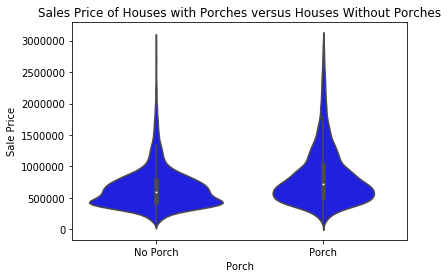

In [146]:
sns.violinplot(data=ordtable, x='Porch', y='SalePrice', color='blue')
plt.title('Sales Price of Houses with Porches versus Houses Without Porches')
plt.ylabel('Sale Price');

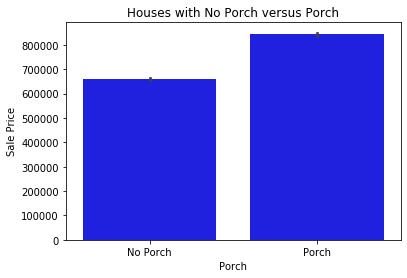

In [161]:
sns.barplot(data=ordtable, x='Porch', y='SalePrice', color='blue')
plt.title('Houses with No Porch versus Porch')
plt.ylabel('Sale Price');

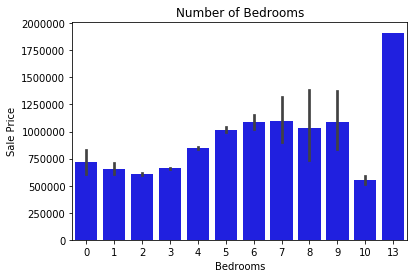

In [159]:
sns.barplot(data=ordtable, x='Bedrooms', y='SalePrice', color='blue')
plt.title('Number of Bedrooms')
plt.ylabel('Sale Price');

In [130]:
# second one combines square foots for Square Footage vs Price graph and House to Lot proportion graph
ordtable['TotFloorPlan'] = (ordtable['SqFtGarageAttached'] + ordtable['SqFtDeck'] + ordtable['SqFtPorch'] + ordtable['SqFt1stFloor'])
# ordtable['PropLot'] = ordtable['TotFloorPlan'] / ordtable['SqFtLot']

In [131]:
ordtable['TotFloorPlan']

0        1460
1         810
2        1980
3        2940
4         690
         ... 
28296    2293
28297    1480
28298    1970
28299    1790
28300    1270
Name: TotFloorPlan, Length: 27924, dtype: int64

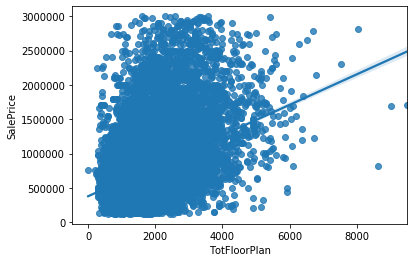

In [148]:
sns.regplot(y='SalePrice',x='TotFloorPlan', data=ordtable);

In [165]:
# total floor plan vs price split into small<1000Sft, Medium between 1000 and 3000 and large >3000
ordtable['Size']=ordtable['TotFloorPlan'].map(lambda x: 'Small' if x<1000 else('Large' if x>3000 else 'Medium'))

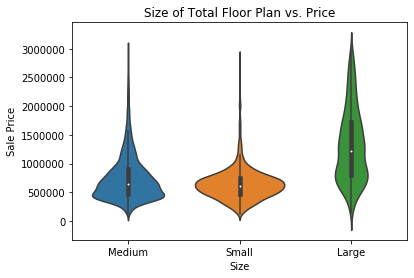

In [169]:
sns.violinplot(y='SalePrice',x='Size', data=ordtable)
plt.title('Size of Total Floor Plan vs. Price')
plt.ylabel('Sale Price');
#plt.savefig('reports/figures/')

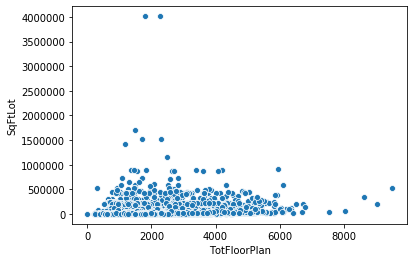

In [171]:
sns.scatterplot(y='SqFtLot',x='TotFloorPlan', data=ordtable);